Basic Implementation

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    shuffle=True
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.39MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.57MB/s]


In [3]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [5]:
latent_dim = 100

generator = Generator(latent_dim)
discriminator = Discriminator()

criterion = nn.BCELoss()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)


In [6]:
epochs = 20

for epoch in range(epochs):

    for real_images, _ in train_loader:

        batch_size = real_images.size(0)

        real_images = real_images.view(batch_size, -1)

        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)



        noise = torch.randn(batch_size, latent_dim)
        fake_images = generator(noise)

        real_loss = criterion(discriminator(real_images), real_labels)
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)

        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()



        noise = torch.randn(batch_size, latent_dim)
        fake_images = generator(noise)

        g_loss = criterion(discriminator(fake_images), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [1/20] D Loss: 0.0087 | G Loss: 6.8183
Epoch [2/20] D Loss: 0.0744 | G Loss: 5.5917
Epoch [3/20] D Loss: 0.2074 | G Loss: 4.5829
Epoch [4/20] D Loss: 1.1002 | G Loss: 3.4955
Epoch [5/20] D Loss: 0.4288 | G Loss: 3.2203
Epoch [6/20] D Loss: 0.2480 | G Loss: 4.1215
Epoch [7/20] D Loss: 0.1321 | G Loss: 5.4350
Epoch [8/20] D Loss: 0.2528 | G Loss: 5.5176
Epoch [9/20] D Loss: 0.1514 | G Loss: 5.2097
Epoch [10/20] D Loss: 0.1482 | G Loss: 5.0496
Epoch [11/20] D Loss: 0.0927 | G Loss: 6.6741
Epoch [12/20] D Loss: 0.1772 | G Loss: 6.0826
Epoch [13/20] D Loss: 0.1103 | G Loss: 6.6679
Epoch [14/20] D Loss: 0.0464 | G Loss: 9.6186
Epoch [15/20] D Loss: 0.3467 | G Loss: 5.3980
Epoch [16/20] D Loss: 0.1901 | G Loss: 6.2735
Epoch [17/20] D Loss: 0.2823 | G Loss: 5.7880
Epoch [18/20] D Loss: 0.1570 | G Loss: 5.6480
Epoch [19/20] D Loss: 0.3022 | G Loss: 3.9704
Epoch [20/20] D Loss: 0.0739 | G Loss: 4.4199


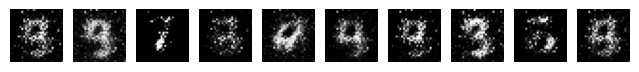

In [7]:
noise = torch.randn(10, latent_dim)
generated_images = generator(noise)

generated_images = generated_images.view(-1, 28, 28).detach()

plt.figure(figsize=(8,2))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')

plt.show()


Full Implementation

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

class DCGenerator(nn.Module):
    def __init__(self, latent_dim=100):
        super(DCGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 1, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class DCDiscriminator(nn.Module):
    def __init__(self):
        super(DCDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 128, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),
            nn.Conv2d(512, 1, 4, 1, 0),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

latent_dim = 100

generator = DCGenerator(latent_dim)
discriminator = DCDiscriminator()

criterion = nn.BCELoss()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

epochs = 25

for epoch in range(epochs):

    for imgs, _ in dataloader:

        batch_size = imgs.size(0)

        real_outputs = discriminator(imgs)
        real_labels = torch.ones_like(real_outputs)

        d_real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, latent_dim, 1, 1)
        fake_imgs = generator(noise)

        fake_outputs = discriminator(fake_imgs.detach())
        fake_labels = torch.zeros_like(fake_outputs)

        d_fake_loss = criterion(fake_outputs, fake_labels)

        d_loss = d_real_loss + d_fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        gen_outputs = discriminator(fake_imgs)
        g_labels = torch.ones_like(gen_outputs)

        g_loss = criterion(gen_outputs, g_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print("Epoch:", epoch+1, "D Loss:", d_loss.item(), "G Loss:", g_loss.item())

noise = torch.randn(10, latent_dim, 1, 1)
fake_images = generator(noise)

fake_images = fake_images.detach()

plt.figure(figsize=(10,2))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(fake_images[i][0], cmap='gray')
    plt.axis('off')

plt.show()


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 508kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.53MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.73MB/s]


Epoch: 1 D Loss: 0.00016000676259864122 G Loss: 10.472537994384766
Epoch: 2 D Loss: 0.0013263019500300288 G Loss: 8.302746772766113
Epoch: 3 D Loss: 0.0007942712982185185 G Loss: 8.57627010345459
Epoch: 4 D Loss: 0.000109018714283593 G Loss: 10.419044494628906
Epoch: 5 D Loss: 4.420160985318944e-05 G Loss: 10.63524341583252
